In [4]:
!pip install geopandas

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
import io, requests

# Administrative Boundaries of India & West Bengal

In [55]:
ind_bound = gpd.read_file('IND_AL2_India.json')
ind_bound.head()

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,,India,India,India,,administrative,2,Q668,hi:भारत,2019-10-02 22:56:03,"MULTIPOLYGON (((93.78876 6.90034, 93.78876 6.9..."


In [56]:
ind_bound_all = gpd.read_file('IND_ALL_states.json')
ind_bound_all.head()

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-AN,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Union Territory of Andaman and Nicobar Islands,administrative,4,Q40888,en:Andaman and Nicobar Islands,2019-09-29 22:07:01,"MULTIPOLYGON (((93.94419 6.99219, 93.94419 6.9..."
1,IND,IN-AP,Andhra Pradesh,Andhra Pradesh,Andhra Pradesh,,administrative,4,Q1159,en:Andhra Pradesh,2019-10-04 22:35:01,"MULTIPOLYGON (((76.76365 14.98503, 76.76736 14..."
2,IND,IN-AR,Arunachal Pradesh,Arunachal Pradesh,Arunachal Pradesh,,administrative,4,Q1162,en:Arunachal Pradesh,2019-09-28 22:16:02,"POLYGON ((91.56231 27.63221, 91.56233 27.63145..."
3,IND,IN-AS,Assam,Assam,Assam,,administrative,4,Q1164,en:Assam,2019-09-28 22:16:02,"POLYGON ((95.94798 27.93723, 95.94870 27.93796..."
4,IND,IN-BR,Bihar,Bihar,Bihar,,administrative,4,Q1165,en:Bihar,2019-10-01 22:00:02,"POLYGON ((83.32126 25.02036, 83.32147 25.01803..."


In [59]:
wb_boundary = gpd.read_file('IND_AL4_West Bengal.json')
wb_boundary.head()

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-WB,West Bengal,West Bengal,West Bengal,,administrative,4,Q1356,en:West Bengal,2019-10-04 22:35:01,"MULTIPOLYGON (((88.06765 27.19043, 88.07479 27..."


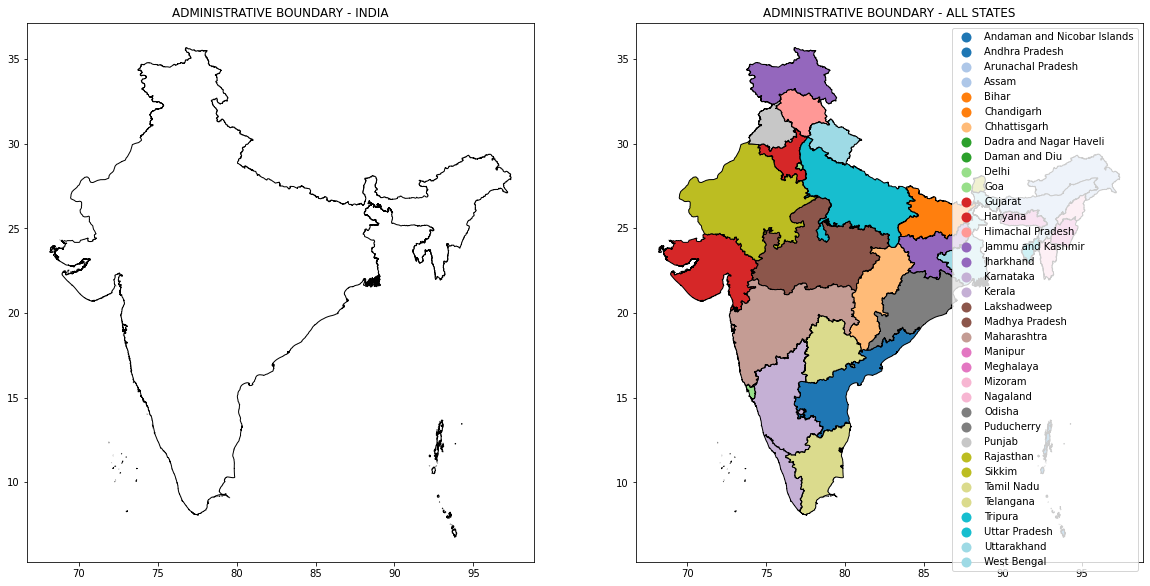

In [58]:
ind_boundary  = ind_bound[['name', 'geometry']]
ind_all = ind_bound_all[['name', 'geometry']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('ADMINISTRATIVE BOUNDARY - INDIA')
ax2.set_title('ADMINISTRATIVE BOUNDARY - ALL STATES OF INDIA')
plot_boundary(ind_boundary, ax1)
plot_feature(ind_all, ax2, 'name')

plt.show()

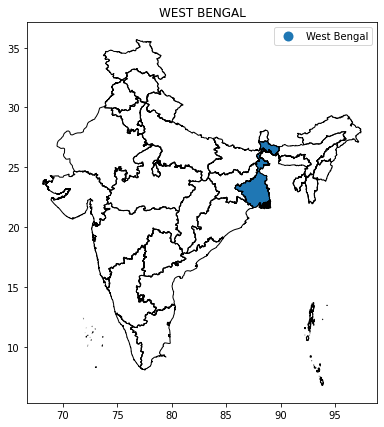

In [63]:
wb_state_boundary = wb_boundary[['name', 'geometry']]
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.set_title('WEST BENGAL')
plot_boundary(ind_all, ax)
plot_feature(wb_state_boundary, ax, 'name')

plt.show()

# Soil Cover of India & West Bengal

In [67]:
ind_soil = gpd.read_file('IND_AL2_India_WSR.json')
ind_soil.head()

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,IND,,India,AC,23,Acrisol,2,"MULTIPOLYGON (((92.56884 10.80253, 92.56764 10..."
1,IND,,India,AR,3,Arenosol,2,"MULTIPOLYGON (((69.62064 24.26911, 69.61684 24..."
2,IND,,India,CL,29,Calcisol,2,"MULTIPOLYGON (((68.89517 24.25835, 68.89476 24..."
3,IND,,India,CM,2,Cambisol,2,"MULTIPOLYGON (((88.33736 26.47869, 88.33716 26..."
4,IND,,India,FL,20,Fluvisol,2,"MULTIPOLYGON (((91.37963 23.14395, 91.32592 23..."


In [69]:
wb_soil = gpd.read_file('IND_AL4_West Bengal_WSR.json')
wb_soil.head()

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,IND,IN-WB,West Bengal,AC,23,Acrisol,4,"MULTIPOLYGON (((89.75352 26.73424, 89.75164 26..."
1,IND,IN-WB,West Bengal,CM,2,Cambisol,4,"MULTIPOLYGON (((88.20591 25.54884, 88.11241 25..."
2,IND,IN-WB,West Bengal,GL,7,Gleysol,4,"MULTIPOLYGON (((89.00590 21.65235, 89.00619 21..."
3,IND,IN-WB,West Bengal,LP,18,Leptosol,4,"POLYGON ((88.06765 27.19043, 88.07479 27.20069..."
4,IND,IN-WB,West Bengal,LX,6,Lixisol,4,"POLYGON ((87.64367 24.25013, 87.63871 24.25260..."


In [71]:
ind_soil.columns = column_std(ind_soil)
ind_soil = ind_soil[['ipcc', 'geometry']]

wb_soil.columns = column_std(wb_soil)
wb_soil = wb_soil[['ipcc', 'geometry']]

In [72]:
print("Soils found in India: ")
print(ind_soil['ipcc'])

print("\nSoils found in West Bengal: ")
print(wb_soil['ipcc'])

Soils found in India: 
0         Acrisol
1        Arenosol
2        Calcisol
3        Cambisol
4        Fluvisol
5         Gleysol
6        Leptosol
7         Luvisol
8         Lixisol
9         Nitisol
10       Vertisol
11    Waterbodies
Name: ipcc, dtype: object

Soils found in West Bengal: 
0     Acrisol
1    Cambisol
2     Gleysol
3    Leptosol
4     Lixisol
Name: ipcc, dtype: object


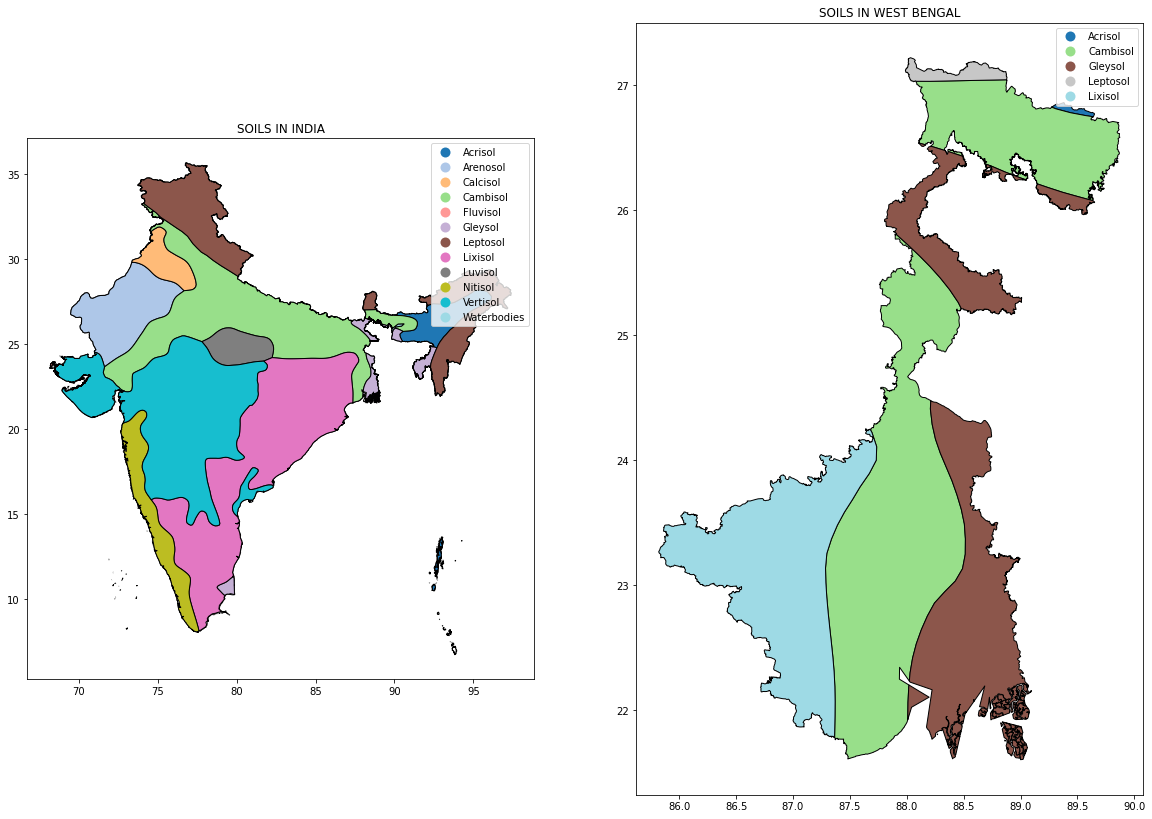

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('SOILS IN INDIA')
ax2.set_title('SOILS IN WEST BENGAL')
plot_boundary(ind_boundary, ax1)
plot_feature(ind_soil, ax1, "ipcc")
plot_feature(wb_soil, ax2, "ipcc")

plt.show()

# Forest Cover of India & West Bengal

In [74]:
ind_forest=gpd.read_file('IND_AL2_India_GEZ.json')
ind_forest.head()

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,IND,,India,Subtropical mountain system,25,SM,2,"MULTIPOLYGON (((93.38087 27.46374, 93.44117 27..."
1,IND,,India,Subtropical steppe,23,SBSh,2,"MULTIPOLYGON (((73.92919 34.30517, 73.92148 34..."
2,IND,,India,Temperate mountain system,35,TeM,2,"MULTIPOLYGON (((78.26877 34.63843, 78.26877 34..."
3,IND,,India,Tropical desert,15,TBWh,2,"MULTIPOLYGON (((69.25014 22.26431, 69.25014 22..."
4,IND,,India,Tropical dry forest,13,TAwb,2,"MULTIPOLYGON (((79.70680 10.28820, 79.70292 10..."


In [75]:
wb_forest=gpd.read_file('IND_AL4_West Bengal_GEZ.json')
wb_forest.head()

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,IND,IN-WB,West Bengal,Tropical dry forest,13,TAwb,4,"POLYGON ((85.90875 23.48340, 85.90811 23.48407..."
1,IND,IN-WB,West Bengal,Tropical moist forest,12,TAwa,4,"MULTIPOLYGON (((88.17889 21.59667, 88.17835 21..."
2,IND,IN-WB,West Bengal,Tropical mountain system,16,TM,4,"MULTIPOLYGON (((88.28249 27.12757, 88.28204 27..."
3,IND,IN-WB,West Bengal,Tropical rainforest,11,TAr,4,"MULTIPOLYGON (((88.47396 27.11942, 88.47241 27..."


In [77]:
ind_forest.columns = column_std(ind_forest)
ind_forest = ind_forest[['gez_name', 'geometry']]

wb_forest.columns = column_std(wb_forest)
wb_forest = wb_forest[['gez_name', 'geometry']]

In [78]:
print("Forests found in India: ")
print(ind_forest['gez_name'])

print("\nForests found in West Bengal: ")
print(wb_forest['gez_name'])

Forests found in India: 
0    Subtropical mountain system
1             Subtropical steppe
2      Temperate mountain system
3                Tropical desert
4            Tropical dry forest
5          Tropical moist forest
6       Tropical mountain system
7            Tropical rainforest
8             Tropical shrubland
Name: gez_name, dtype: object

Forests found in West Bengal: 
0         Tropical dry forest
1       Tropical moist forest
2    Tropical mountain system
3         Tropical rainforest
Name: gez_name, dtype: object


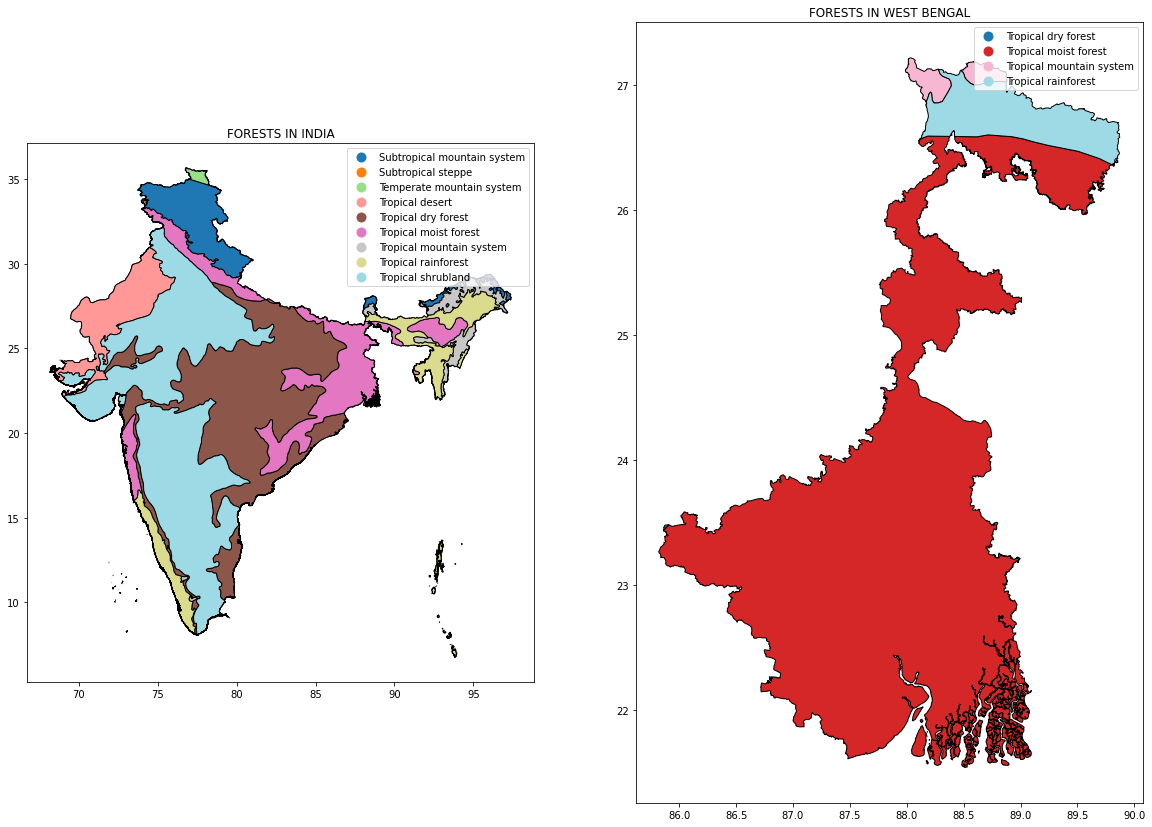

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('FORESTS IN INDIA')
ax2.set_title('FORESTS IN WEST BENGAL')
plot_boundary(ind_boundary, ax1)
plot_feature(ind_forest, ax1, "gez_name")
plot_feature(wb_forest, ax2, "gez_name")

plt.show()

# Biodiversity Hotspots of India & WB

In [84]:
bio_hotspot = gpd.read_file('CI_BiodiversityHotspots.geojson')
bio_hotspot.head()

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -..."
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -..."
4,5,New Caledonia,hotspot area,24.637100,1.646954,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161..."


In [85]:
bio_hotspot.columns = column_std(bio_hotspot)

#considering only Indian part
ind_bio = clip_df(bio_hotspot, ind_boundary)
ind_bio = ind_bio[['name', 'geometry']]

#considering only West Bengal part
wb_bio = clip_df(ind_bio, wb_boundary)

C:\Users\Megha\anaconda3\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
C:\Users\Megha\anaconda3\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [86]:
print("Biodiversity Hotspots found in India: ")
print(ind_bio['name'])

print("\nBiodiversity Hotspots found in West Bengal: ")
print(wb_bio['name'])

Biodiversity Hotspots found in India: 
39                      Sundaland
33                      Sundaland
13                     Indo-Burma
12                     Indo-Burma
21    Western Ghats and Sri Lanka
10                       Himalaya
Name: name, dtype: object

Biodiversity Hotspots found in West Bengal: 
10    Himalaya
Name: name, dtype: object


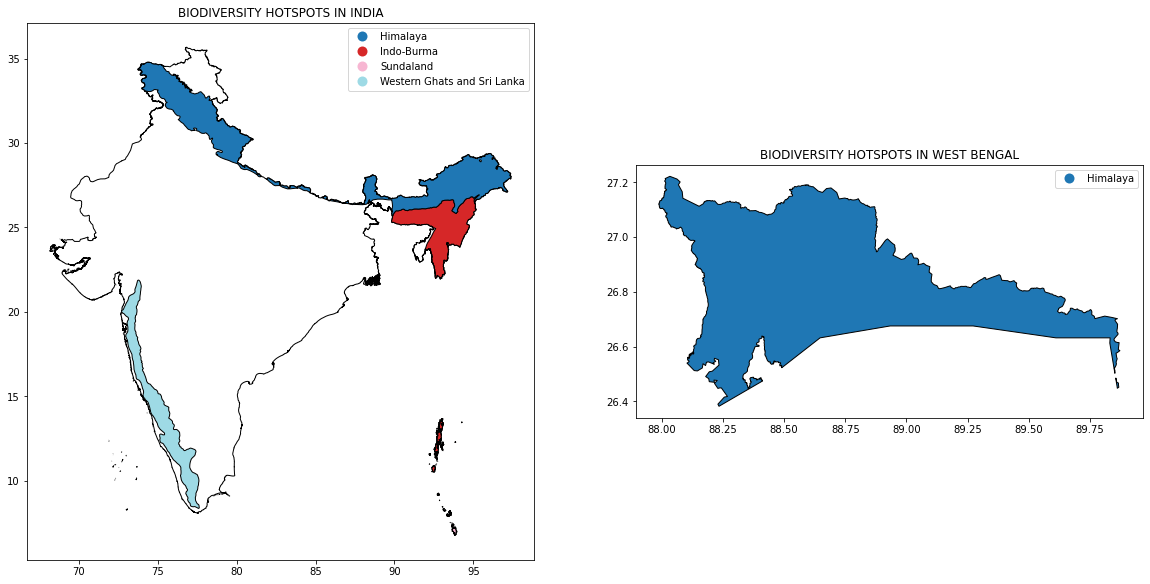

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
ax1.set_title('BIODIVERSITY HOTSPOTS IN INDIA')
ax2.set_title('BIODIVERSITY HOTSPOTS IN WEST BENGAL')
plot_boundary(ind_boundary, ax1)
plot_feature(ind_bio, ax1, "name")
plot_feature(wb_bio, ax2, "name")

plt.show()